# Рубежный контроль №1
## Вариант 5
### Ильина Ксения Андреевна, РТ5-61Б

## Задача №1.
Для заданного набора данных проведите корреляционный анализ. 
В случае наличия пропусков в данных удалите строки или колонки, содержащие пропуски. 
Сделайте выводы о возможности построения моделей машинного обучения и о возможном вкладе признаков в модель.

### Основные атрибуты датасета "Graduate Admission 2"
1) Serial No.
2) GRE Score ( out of 340 )
3) TOEFL Score ( out of 120 )
4) University Rating ( out of 5 )
5) SOP (Statement of Purpose) ( out of 5 )
6) LOR (Letter of Recommendation Strength ) ( out of 5 )
7) CGPA (Undergraduate GPA ) ( out of 10 )
8) Research (Experience) ( either 0 or 1 )
9) Chance of Admit ( ranging from 0 to 1 )



### Импорт библиотек

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Загрузка данных

In [21]:
data = pd.read_csv('Admission_Predict.csv')

In [22]:
# Проверка на пропуски
print(data.isnull().sum())


Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


Пропусков нет, нет необходимости удалять строки или колонки, содержащие пропуски. Проведём кореляционный анализ

In [23]:
# Корреляционный анализ
correlation_matrix = data.corr()
print(correlation_matrix['Chance of Admit '].sort_values(ascending=False))

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Serial No.           0.042336
Name: Chance of Admit , dtype: float64


### Дополнительное задание
Для пары произвольных колонок данных построить график "Jointplot"

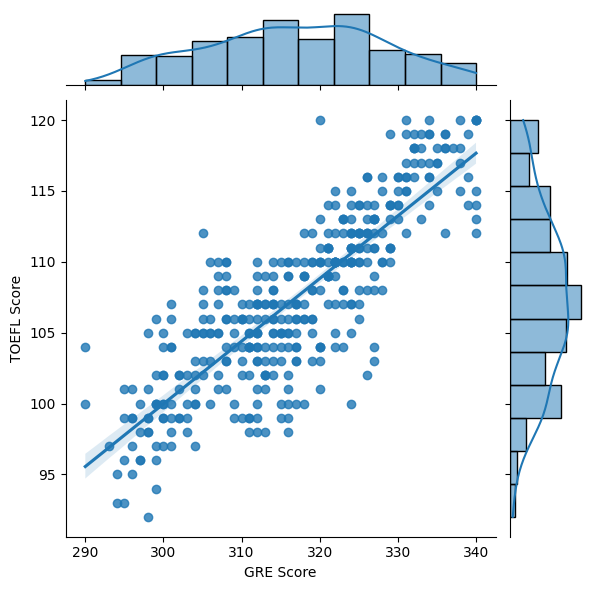

In [24]:
# Jointplot
sns.jointplot(x='GRE Score', y='TOEFL Score', data=data, kind='reg')
plt.show()

## Выводы
Данные хорошо подходят для машинного обучения, все признаки числовые, пропусков нет, и так как целевая переменная Chance of Admit (вероятность поступления) четко зависит от ключевых признаков:

CGPA (средний балл, корреляция 0.87) — самый важный фактор.

GRE (0.8) и TOEFL (0.79) — тоже сильно влияют, но чуть слабее.

Остальные признаки (рейтинг вуза, мотивационное письмо, рекомендации) полезны, но их вклад меньше. Так как GRE и TOEFL сильно связаны между собой, лучше оставить в модели только один из них, чтобы не усложнять расчеты.